In [30]:
from qiskit import IBMQ
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.0.dev0+3562e26', 'qiskit-aer': '0.10.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.0.dev0+8455b01', 'qiskit-aqua': None, 'qiskit': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [31]:
IBMQ.stored_account()

{'token': '2916c8f35261ae6714a1a3a0be3f95ce6f350a68307bfd3a12bb007ffa6dfac17a11d72b46e629512f960313e26f81dd2761912721c64797229a9d74048b4cd7',
 'url': 'https://auth.quantum-computing.ibm.com/api'}

In [32]:
#IBMQ.enable_account(token,url)

In [33]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='anl', project='csc430')
provider.backends()

RequestsApiError: "HTTPSConnectionPool(host='auth.quantum-computing.ibm.com', port=443): Max retries exceeded with url: /api/version (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f8531d50bd0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))"

In [ ]:
import math
import numpy as np
import random
import re
import qiskit.tools.jupyter

from qiskit import *
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import StochasticSwap, BasicSwap

from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
%matplotlib inline

from qiskit.providers.aer import AerSimulator

In [ ]:
device = provider.get_backend('ibmq_casablanca')
backend_monitor(device)
device

In [ ]:
import qiskit
from gate_variants.toffoli_variants import CCX_Variant_Gate
from qiskit.compiler import transpile

In [ ]:
qc_0 = qiskit.circuit.QuantumCircuit(15)
qc_0.append(CCX_Variant_Gate(variant_tag=('01','02','s')),[0,1,2])
qc_0.append(CCX_Variant_Gate(variant_tag=('12','01','s')),[3,4,5])
qc_0.append(CCX_Variant_Gate(variant_tag=('02','01','p')),[6,7,8])
qc_0.append(CCX_Variant_Gate(variant_tag=('01','12','p')),[9,10,11])
qc_0.append(CCX_Variant_Gate(variant_tag=('01','01','s')),[12,13,14])

In [ ]:
qc_0.draw()

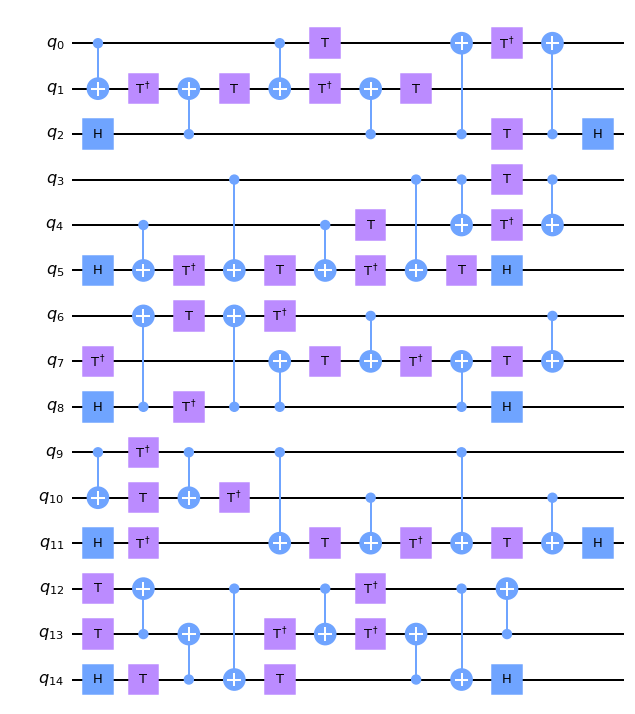

In [10]:
basis_gate_set = ['id', 'rz', 'sx', 'x', 'cx', 'reset']
trans_qc0 = transpile(qc_0, optimization_level=3)
trans_qc0.draw(output='mpl')

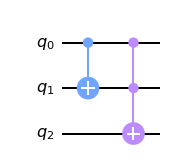

In [11]:
circ = QuantumCircuit(3)
circ.cx(0,1)
circ.ccx(0,1,2)
circ.draw(output = 'mpl')

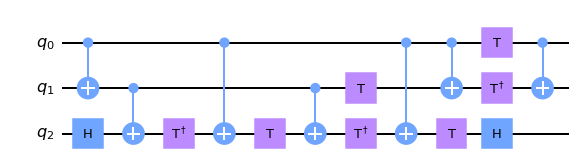

In [12]:
trans_circ = transpile(circ, optimization_level = 3)
trans_circ.draw(output = 'mpl')

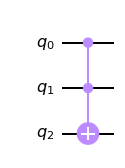

In [13]:
circ2 = QuantumCircuit(3)
circ2.ccx(0,1,2)
circ2.draw(output = 'mpl')

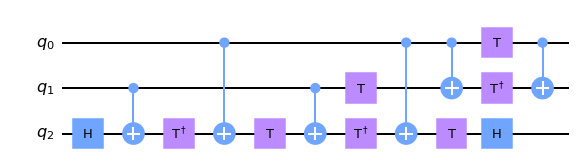

In [14]:
trans_circ2 = transpile(circ2, optimization_level = 3)
trans_circ2.draw(output = 'mpl')

In [15]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ2, simulator).result()
unitary = result.get_unitary(circ2)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


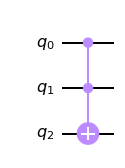

In [16]:
circ3 = QuantumCircuit(3)
circ3.ccx(0,1,2).inverse()
circ3.draw(output = 'mpl')

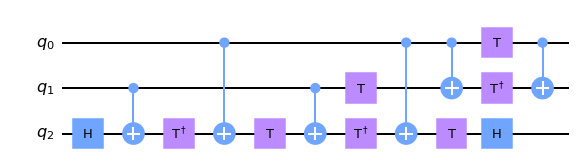

In [17]:
trans_circ2 = transpile(circ3, optimization_level = 3)
trans_circ2.draw(output = 'mpl')

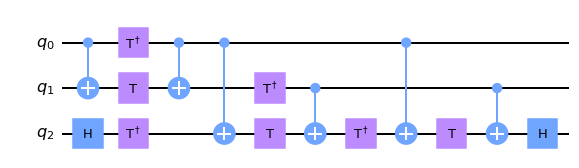

In [18]:
circ3 = trans_circ2.inverse()
circ3.draw(output = 'mpl')

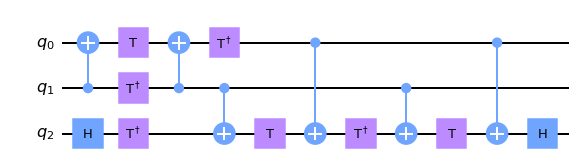

In [19]:
circ4 = QuantumCircuit(3)
circ4.cx(1,0)
circ4.t(0)
circ4.tdg(1)
circ4.cx(1,0)
circ4.h(2)
circ4.tdg(2)
circ4.cx(1,2)
circ4.tdg(0)
circ4.t(2)
circ4.cx(0,2)
circ4.tdg(2)
circ4.cx(1,2)
circ4.t(2)
circ4.cx(0,2)
circ4.h(2)
circ4.draw(output = 'mpl')

In [20]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ4, simulator).result()
unitary = result.get_unitary(circ4)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 Operator([[ 1.00000000e+00-2.19800285e-17j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            2.45660405e-16+8.32123684e-17j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00+0.00000000e+00j,
            1.00000000e+00+1.72722830e-17j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
           -7.78822944e-17+1.00484651e-16j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            1.00000000e+00+1.72722830e-17j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
           -

In [21]:
circ5 = QuantumCircuit(3)
circ5.cx(0,1)
circ5 = circ5 + trans_circ2.inverse()
circ5.draw()

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  This is separate from the ipykernel package so we can avoid doing imports until


┌─────┐                                                 
q_0: ──■─────■───┤ Tdg ├──■────■───────────────────────■─────────────────
     ┌─┴─┐ ┌─┴─┐ └┬───┬┘┌─┴─┐  │  ┌─────┐              │                 
q_1: ┤ X ├─┤ X ├──┤ T ├─┤ X ├──┼──┤ Tdg ├──■───────────┼─────────■───────
     ├───┤┌┴───┴┐ └───┘ └───┘┌─┴─┐└┬───┬┘┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌───┐
q_2: ┤ H ├┤ Tdg ├────────────┤ X ├─┤ T ├─┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ H ├
     └───┘└─────┘            └───┘ └───┘ └───┘└─────┘└───┘└───┘└───┘└───┘

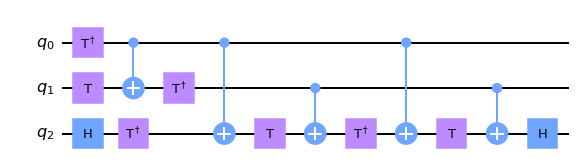

In [22]:
trans_circ = transpile(circ5, optimization_level = 2)
trans_circ.draw(output = 'mpl')

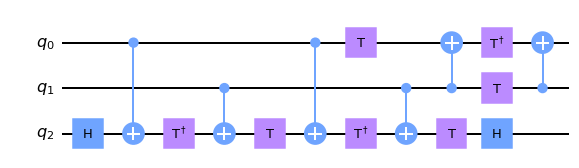

In [23]:
tqc = circ4.inverse()
tqc.draw(output = 'mpl')

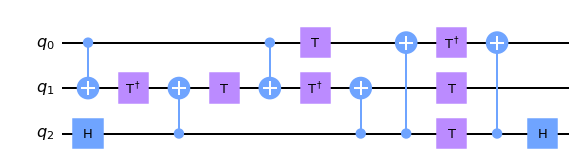

In [24]:
circ5 = QuantumCircuit(3)
circ5.h(2)
circ5.cx(0,1)
circ5.tdg(1)
circ5.cx(2,1)
circ5.t(1)
circ5.cx(0,1)
circ5.t(0)
circ5.tdg(1)
circ5.cx(2,1)
circ5.cx(2,0)
circ5.tdg(0)
circ5.t(2)
circ5.t(1)
circ5.cx(2,0)
circ5.h(2)
circ5.draw(output = 'mpl')

In [25]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ5, simulator).result()
unitary = result.get_unitary(circ5)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 Operator([[ 1.00000000e+00-6.12323400e-17j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            2.45660405e-16+3.92523115e-17j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00+0.00000000e+00j,
            1.00000000e+00-6.12323400e-17j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            7.91269515e-17+2.19800285e-17j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            1.00000000e+00-6.12323400e-17j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            

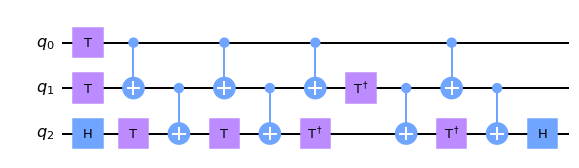

In [26]:
circ5 = QuantumCircuit(3)
circ5.h(2)
circ5.t(0)
circ5.t(1)
circ5.t(2)
circ5.cx(0,1)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.t(2)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.tdg(1)
circ5.tdg(2)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.tdg(2)
circ5.cx(1,2)
circ5.h(2)
circ5.draw(output = 'mpl')

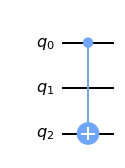

In [27]:
circ5 = QuantumCircuit(3)
circ5.cx(0,2)
circ5.draw(output = 'mpl')

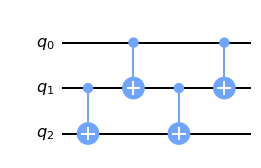

In [28]:
circ5 = QuantumCircuit(3)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.draw(output = 'mpl')

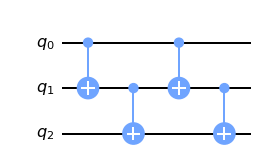

In [29]:
circ5 = QuantumCircuit(3)
circ5.cx(0,1)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.cx(1,2)
circ5.draw(output = 'mpl')